In [ ]:
import numpy as np
import pandas as pd

df_train = pd.read_csv('data_train.csv')
df_test = pd.read_csv('data_test.csv')

x_train = df_train.drop(['label', 'view'], axis=1).values
y_train = df_train['label'].values
train_view = df_train['view'].values

x_test = df_test.drop(['label','view'], axis=1).values  
y_test = df_test['label'].values
test_view = df_test['view'].values

print(f"Kích thước của train và labels {x_train.shape} {y_train.shape}")
print(f"Kích thước của test và labels {x_test.shape} {y_test.shape}")

Kích thước của train và labels (4620, 18) (4620,)
Kích thước của test và labels (3080, 18) (3080,)


## RandomForest classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# phân loại bằng RandomForest
mean_accuracy, y_pred = [], []

rf_model = RandomForestClassifier(
    n_estimators=300, max_depth=20, 
    min_samples_split=2,min_samples_leaf=1,
    max_features='sqrt',bootstrap=True
    )
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

mean_accuracy = (accuracy_score(y_test, y_pred))
print(f'Accuracy: {mean_accuracy * 100:.2f}%')

Accuracy: 93.80%


In [ ]:
# Thử nghiệm xem accuracy thay đổi như thế nào khi thay đổi số k-thành phần
k_range = list(range(1,19)) # với k từ 1 đến 18
all_acc = []

for k in k_range:
    temp_x_train = x_train[:,0:k]
    temp_x_test = x_test[:,0:k]
    
    accuracy, y_pred = [], []


    rf_model = RandomForestClassifier(
        n_estimators=300, max_depth=20, 
        min_samples_split=2,min_samples_leaf=1,
        max_features='sqrt',bootstrap=True
        )
    rf_model.fit(temp_x_train, y_train)
    y_pred = rf_model.predict(temp_x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Độ chính xác với {k} thành phần: {accuracy * 100:.2f}%')
    all_acc.append(accuracy*100)

Độ chính xác với 1 thành phần: 12.66%
Độ chính xác với 2 thành phần: 24.74%
Độ chính xác với 3 thành phần: 44.29%
Độ chính xác với 4 thành phần: 57.21%
Độ chính xác với 5 thành phần: 66.10%
Độ chính xác với 6 thành phần: 71.27%
Độ chính xác với 7 thành phần: 78.25%
Độ chính xác với 8 thành phần: 82.86%
Độ chính xác với 9 thành phần: 86.79%
Độ chính xác với 10 thành phần: 89.19%
Độ chính xác với 11 thành phần: 90.06%
Độ chính xác với 12 thành phần: 90.91%
Độ chính xác với 13 thành phần: 92.31%
Độ chính xác với 14 thành phần: 92.53%
Độ chính xác với 15 thành phần: 92.63%
Độ chính xác với 16 thành phần: 92.79%
Độ chính xác với 17 thành phần: 92.66%
Độ chính xác với 18 thành phần: 93.67%


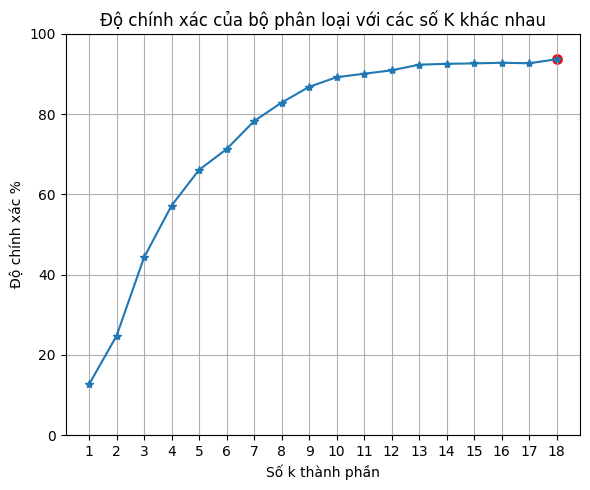

In [38]:
import matplotlib.pyplot as plt

# Tìm vị trí có độ chính xác cao nhất
max_index = all_acc.index(max(all_acc))
best_k = k_range[max_index]
best_acc = all_acc[max_index]

# Làm nổi bật điểm tốt nhất
plt.figure(figsize=(6,5))
plt.title("Độ chính xác của bộ phân loại với các số K khác nhau")
plt.plot(k_range, all_acc, marker = '*', linestyle='-', linewidth = '1.5')

plt.scatter(best_k, best_acc, color='red', s=45, label=f'Max: {best_acc:.2f} at k={best_k}')

plt.xlabel('Số k thành phần')
plt.ylabel('Độ chính xác %')
plt.xticks(k_range)
plt.ylim((0,100))
plt.grid(True)
plt.tight_layout()
plt.show()

## Confusion Matrix

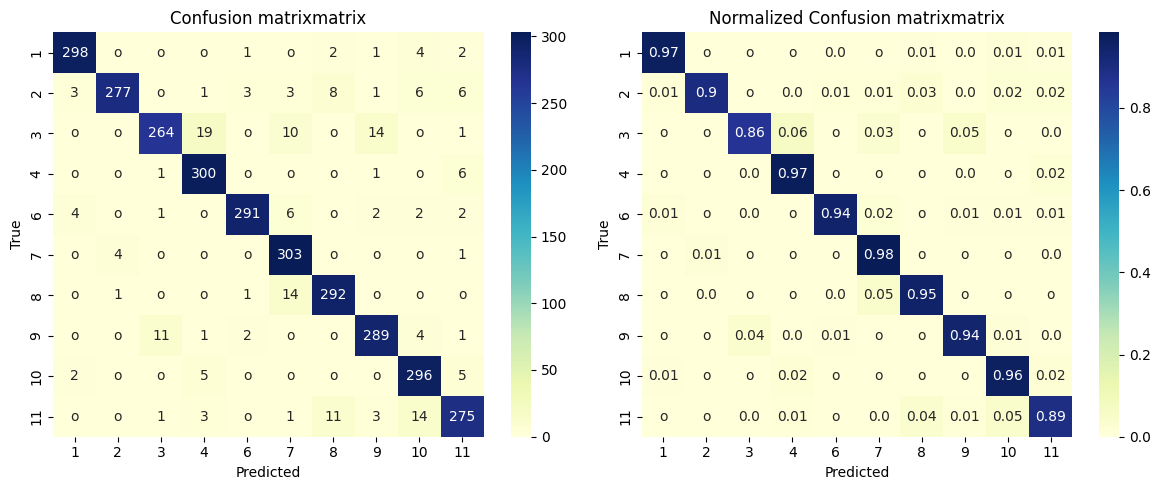

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class_names = list(range(1,12))

def draw_confusion_matrix(y_test, y_pred, class_names, title="Confusion Matrix"):
    # Lọc các class thực tế và dự đoán có trong dữ liệu
    unique_classes = sorted(set(y_test) | set(y_pred))
    filtered_class_names = [cls for cls in class_names if cls in unique_classes]

    # Tạo confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=filtered_class_names)
    cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

     # Create annotation matrices: show value only if non-zero
    annot_cm = np.where(cm == 0, "o", cm)
    annot_cm_norm = np.where(cm_normalized == 0, "o", np.round(cm_normalized, 2))

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 hàng, 2 cột

    # Vẽ confusion matrix gốc
    sns.heatmap(
        cm, annot=annot_cm, fmt='', cmap='YlGnBu',  ax=axes[0],
        xticklabels=filtered_class_names, yticklabels=filtered_class_names
    )
    axes[0].set_title(title)
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')

    # Vẽ confusion matrix đã chuẩn hóa
    sns.heatmap(
        cm_normalized, annot=annot_cm_norm, fmt='', cmap='YlGnBu',  ax=axes[1],
        xticklabels=filtered_class_names, yticklabels=filtered_class_names
    )
    axes[1].set_title(f'Normalized {title}')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('True')
    
    plt.tight_layout()
    plt.show()
        
draw_confusion_matrix(y_test, y_pred, class_names, 'Confusion matrixmatrix') # OKE

In [44]:
# chia y_test và y_pred theo các view để visualize trên Confusion Matrix 3 chiều
views = [0, 18, 36, 54, 72, 90, 108, 126, 144, 162, 180]

# tạo 11 array để giá trị theo views
y_test_by_view = [[] for _ in range(len(views))]
y_pred_by_view = [[] for _ in range(len(views))]

# Duyệt qua tất cả giá trị với y_test và y_pred
for i in range(len(y_test)):
    if int(test_view[i]) in views:
        view_index = views.index(int(test_view[i]))
        y_test_by_view[view_index].append(y_test[i])

for i in range(len(y_pred)):
    if int(test_view[i]) in views:
        view_index = views.index(int(test_view[i]))
        y_pred_by_view[view_index].append(y_pred[i])
        
# In kiểm tra kết quả
for i in range(len(views)):
    print(f"[y_test] Góc {views[i]}° có {len(y_test_by_view[i])} mẫu, [y_pred] Góc {views[i]}° có {len(y_pred_by_view[i])} mẫu")

[y_test] Góc 0° có 280 mẫu, [y_pred] Góc 0° có 280 mẫu
[y_test] Góc 18° có 280 mẫu, [y_pred] Góc 18° có 280 mẫu
[y_test] Góc 36° có 280 mẫu, [y_pred] Góc 36° có 280 mẫu
[y_test] Góc 54° có 280 mẫu, [y_pred] Góc 54° có 280 mẫu
[y_test] Góc 72° có 280 mẫu, [y_pred] Góc 72° có 280 mẫu
[y_test] Góc 90° có 280 mẫu, [y_pred] Góc 90° có 280 mẫu
[y_test] Góc 108° có 280 mẫu, [y_pred] Góc 108° có 280 mẫu
[y_test] Góc 126° có 280 mẫu, [y_pred] Góc 126° có 280 mẫu
[y_test] Góc 144° có 280 mẫu, [y_pred] Góc 144° có 280 mẫu
[y_test] Góc 162° có 280 mẫu, [y_pred] Góc 162° có 280 mẫu
[y_test] Góc 180° có 280 mẫu, [y_pred] Góc 180° có 280 mẫu


C:\Users\HUY\AppData\Local\Temp\ipykernel_3316\1010359445.py:19: RuntimeWarning: invalid value encountered in divide
  cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
C:\Users\HUY\AppData\Local\Temp\ipykernel_3316\1010359445.py:19: RuntimeWarning: invalid value encountered in divide
  cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
C:\Users\HUY\AppData\Local\Temp\ipykernel_3316\1010359445.py:19: RuntimeWarning: invalid value encountered in divide
  cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
C:\Users\HUY\AppData\Local\Temp\ipykernel_3316\1010359445.py:19: RuntimeWarning: invalid value encountered in divide
  cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
C:\Users\HUY\AppData\Local\Temp\ipykernel_3316\1010359445.py:19: RuntimeWarning: invalid value encountered in divide
  cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
C:\Users\HUY\AppData\Local\Temp\ipykernel_3316\1010359445.py:19: RuntimeWarning: invalid value encountered in 

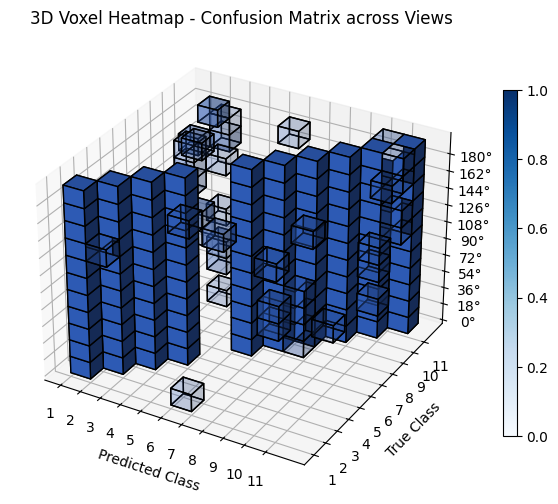

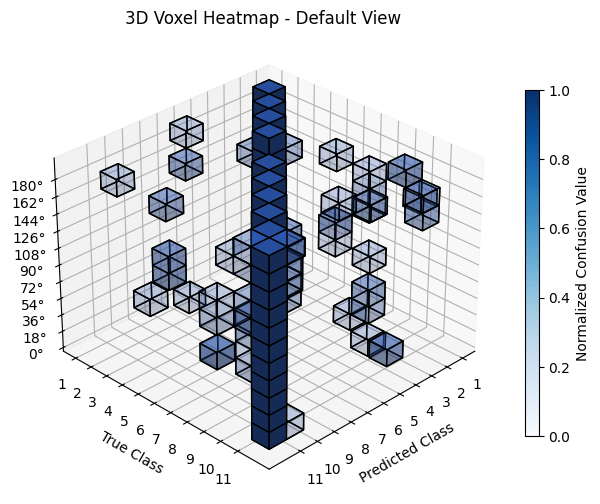

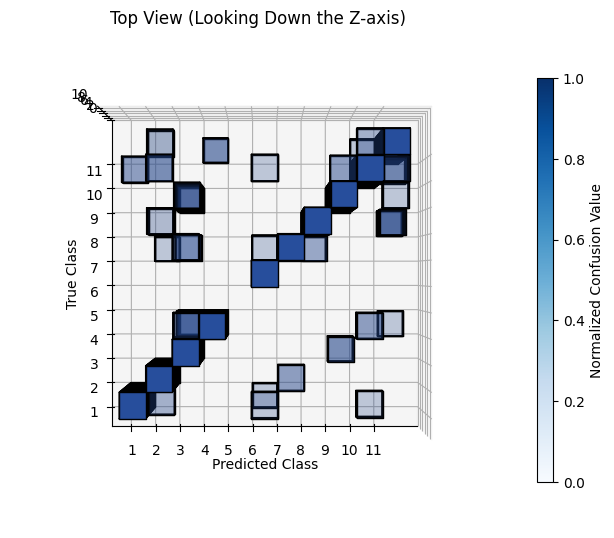

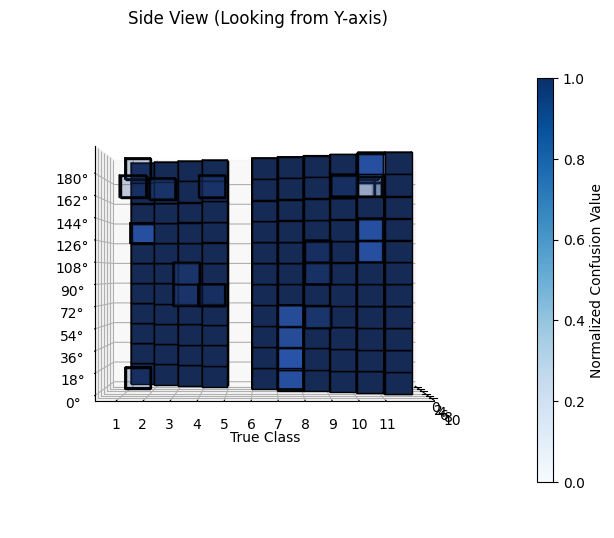

In [47]:
import matplotlib as mpl

def heatmap_3d(y_test_by_view, y_pred_by_view):
    # Tạo dữ liệu giả
    views = [0, 18, 36, 54, 72,90, 108, 126, 144, 162, 180] # 11 hướng đi
    
    # Kích thước của voxel grid
    n_class, n_view = len(class_names), len(views)

    # Tạo lưới voxel: shape (true, pred, view)
    voxel_data = np.zeros((n_class, n_class, n_view))
    colors = np.empty(voxel_data.shape + (4,), dtype=np.float32)  # RGBA

    # Lấp dữ liệu confusion matrix vào voxel
    for v_idx, view in enumerate(views):
        # cm = confusion_matrix(y_test_all[v_idx], y_pred_all[v_idx], labels=class_names)
        cm = confusion_matrix(y_test_by_view[v_idx], y_pred_by_view[v_idx], labels=class_names)
        
        cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)

        for i in range(n_class):        # true class
            for j in range(n_class):    # predicted class
                value = cm_norm[i, j]
                voxel_data[i, j, v_idx] = value > 0.05  # chỉ hiện khối nếu đủ lớn
                alpha = min(value * 2, 1.0)
                colors[i, j, v_idx] = [0.2, 0.4, 0.8, alpha]  # xanh lam với độ trong suốt

    # Vẽ voxel heatmapheatmap
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.voxels(voxel_data, facecolors=colors, edgecolor='k')

    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('True Class')

    ax.set_xticks(np.arange(n_class))
    ax.set_xticklabels(class_names)
    ax.set_yticks(np.arange(n_class))
    ax.set_yticklabels(class_names)
    ax.set_zticks(np.arange(n_view))
    ax.set_zticklabels([f'{v}°' for v in views])
    ax.set_title('3D Voxel Heatmap - Confusion Matrix across Views')

    # Tạo colorbar và sử dụng color bar cho độ trong suốt (alpha value)
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
    sm.set_array([])  # Cần thiết để colorbar hoạt động
    fig.colorbar(sm, ax=ax, shrink=0.75, aspect=25)

    plt.show()
    
    # Đồ thị góc chính diện
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(voxel_data, facecolors=colors, edgecolor='k')

    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('True Class')
    ax.set_xticks(np.arange(n_class))
    ax.set_xticklabels(class_names)
    ax.set_yticks(np.arange(n_class))
    ax.set_yticklabels(class_names)
    ax.set_zticks(np.arange(n_view))
    ax.set_zticklabels([f'{v}°' for v in views])
    ax.set_title('3D Voxel Heatmap - Default View')
    ax.view_init(elev=30, azim=45)

    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, shrink=0.75, aspect=25, label='Normalized Confusion Value')

    plt.show()

    # Đồ thị nhìn từ trên cao xuống
    fig = plt.figure(figsize=(8, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(voxel_data, facecolors=colors, edgecolor='k')

    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('True Class')
    ax.set_xticks(np.arange(n_class))
    ax.set_xticklabels(class_names)
    ax.set_yticks(np.arange(n_class))
    ax.set_yticklabels(class_names)
    ax.set_title('Top View (Looking Down the Z-axis)')
    ax.view_init(elev=90, azim=-90)

    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, shrink=0.75, aspect=25, label='Normalized Confusion Value')

    plt.show()

    # Đồ thị nhìn từ bên hông qua
    fig = plt.figure(figsize=(8, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(voxel_data, facecolors=colors, edgecolor='k')

    ax.set_ylabel('True Class')
    ax.set_yticks(np.arange(n_class))
    ax.set_yticklabels(class_names)
    ax.set_zticks(np.arange(n_view))
    ax.set_zticklabels([f'{v}°' for v in views])
    ax.set_title('Side View (Looking from Y-axis)')
    ax.view_init(elev=0, azim=0)

    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, shrink=0.75, aspect=25, label='Normalized Confusion Value')

    plt.show()

heatmap_3d(y_test_by_view, y_pred_by_view)

## Tách dữ liệu theo view để xem độ chính xác của mô hình

## !!! Sửa lại, tách dữ liệu ra theo view r mới thực hiện predict chứ ko phải tách ra sau khi ĐÃ predict ???

In [48]:
views = [0, 18, 36, 54, 72, 90, 108, 126, 144, 162, 180]

train_views = {}
test_views = {}

for v in views:
    train_views[v] = df_train[df_train['view'] == v]
    test_views[v] = df_test[df_test['view'] == v]

# Nếu bạn muốn tạo các biến riêng biệt:
for v in views:
    globals()[f'train_view{v}'] = train_views[v]
    globals()[f'test_view{v}'] = test_views[v]

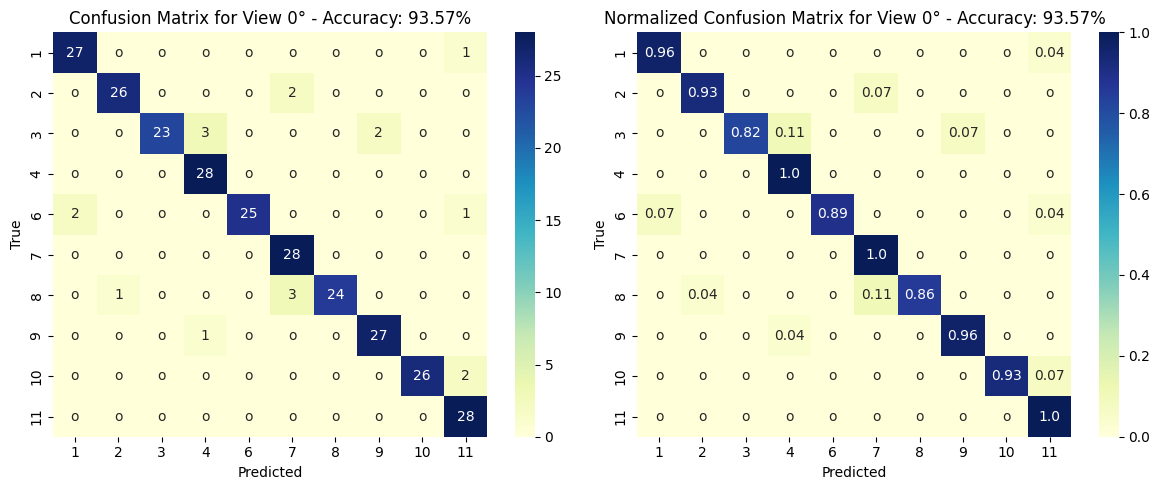

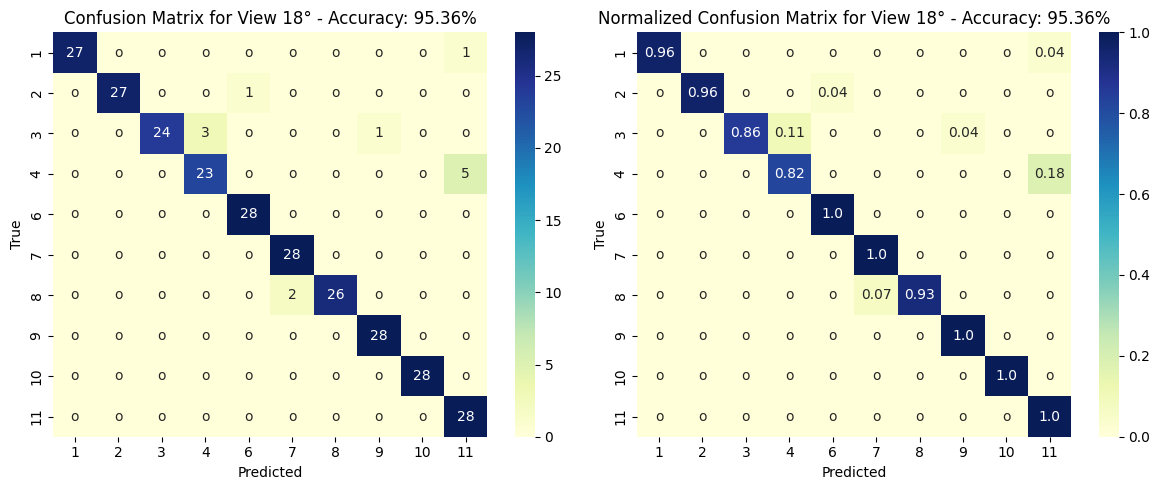

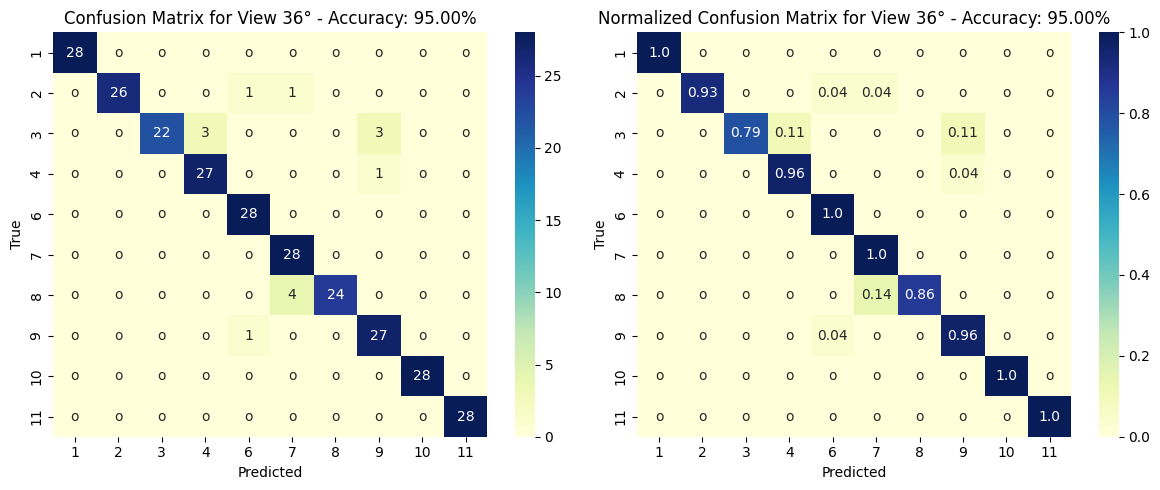

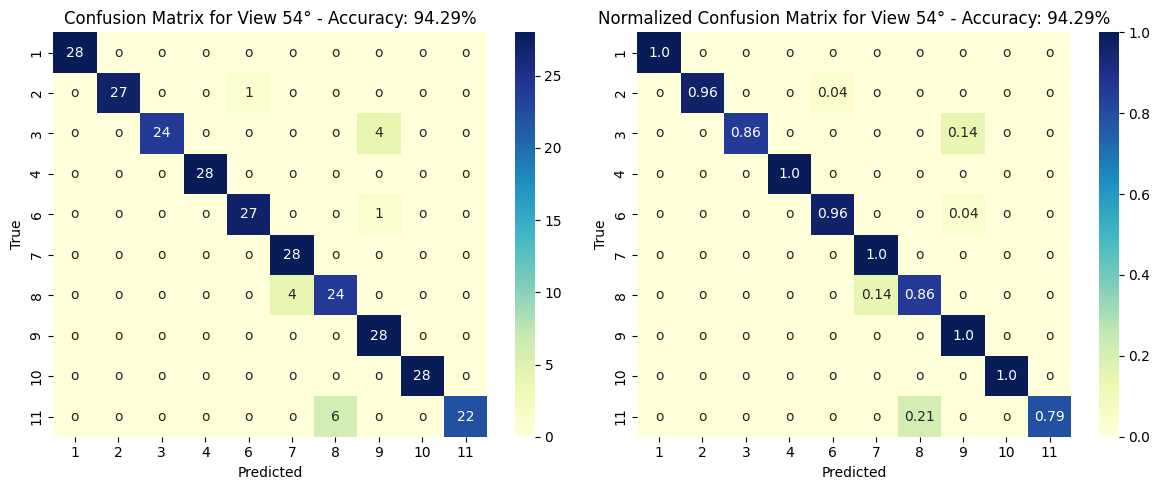

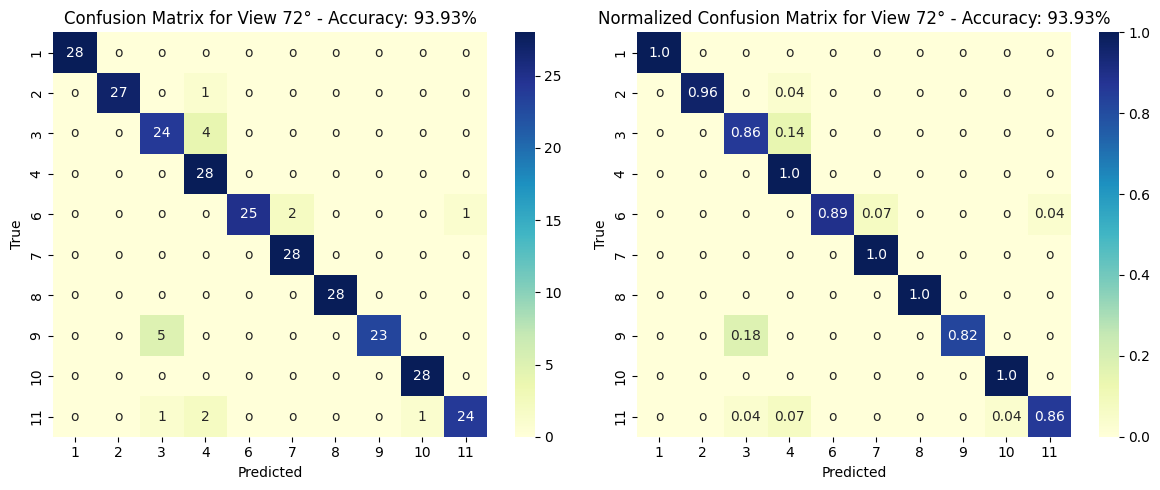

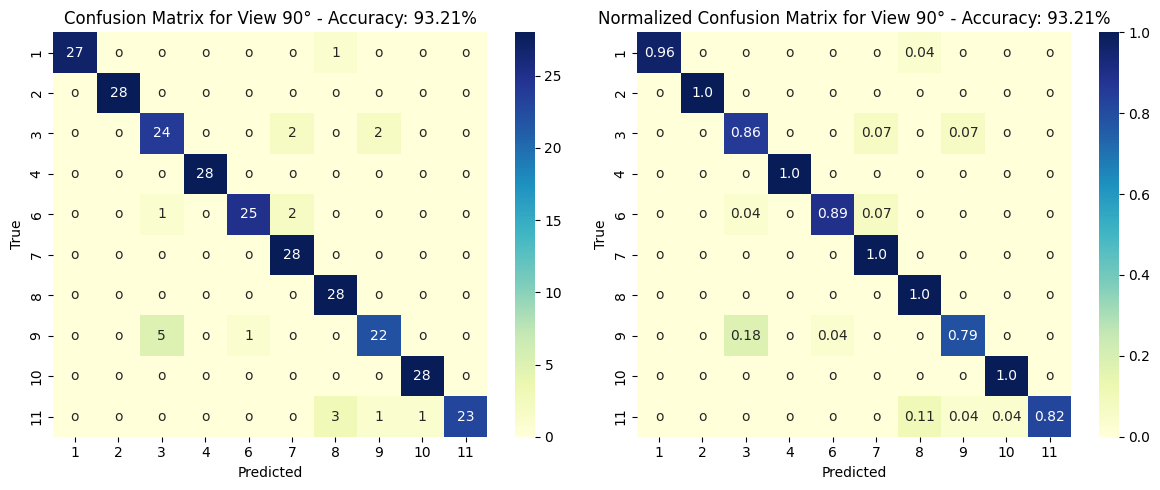

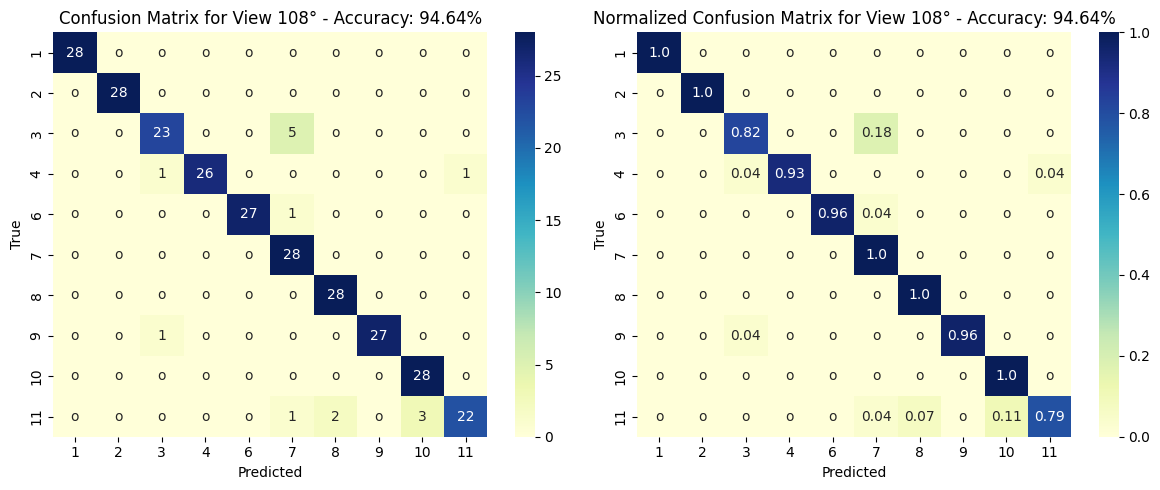

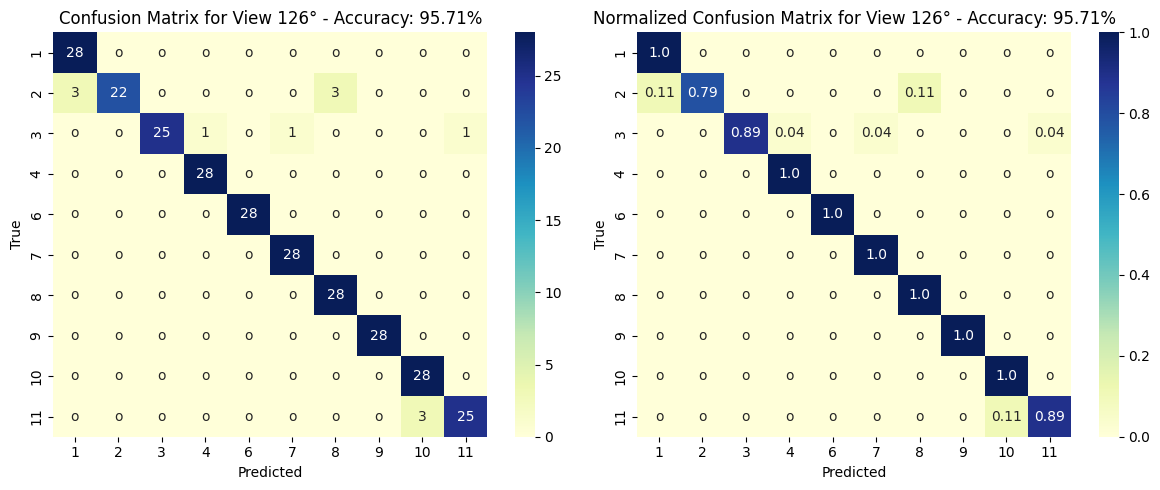

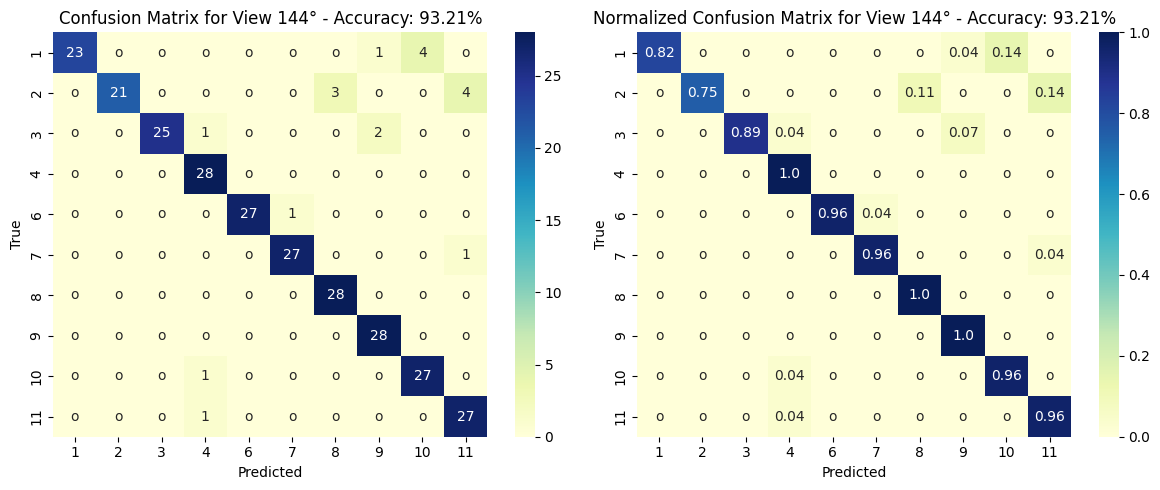

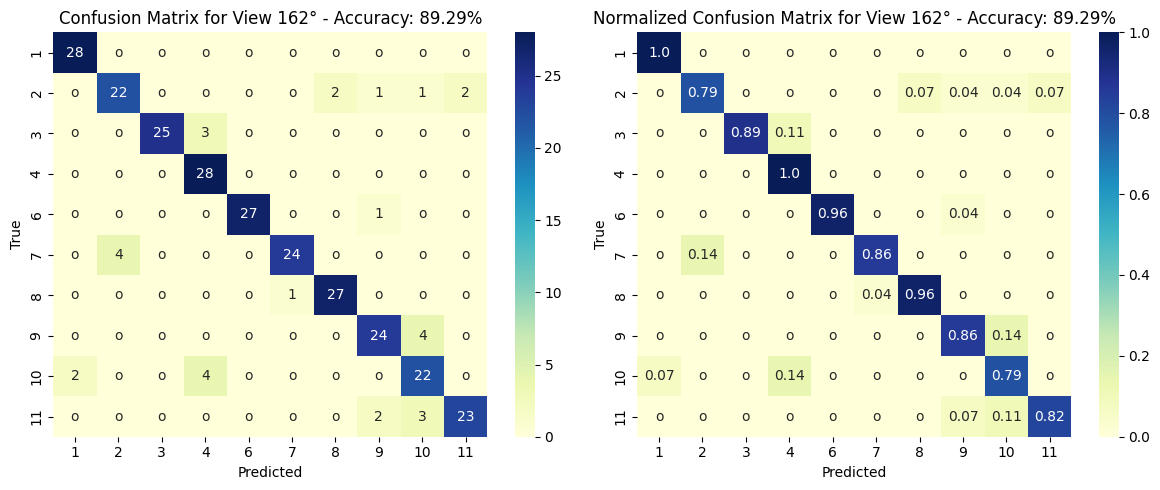

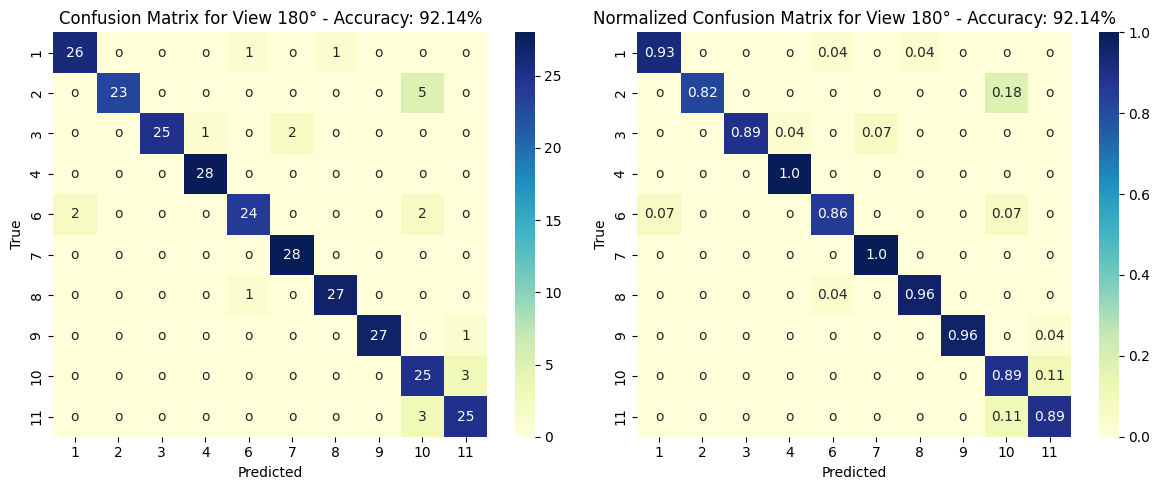

In [52]:
# Sử dụng hàm đã sửa để vẽ confusion matrix cho từng góc
from sklearn.metrics import accuracy_score

view_acc = []
for v in views:
    y_test_view = y_test_by_view[views.index(v)]
    y_pred_view = y_pred_by_view[views.index(v)]

    acc = accuracy_score(y_test_view, y_pred_view)  # chuyển sang %
    view_acc.append(acc)
    draw_confusion_matrix(
        y_test_view,
        y_pred_view,
        class_names,
        title=f'Confusion Matrix for View {v}° - Accuracy: {acc*100:.2f}%')


View có độ chính xác cao nhất: 126 độ — Độ chính xác: 95.71%
View có độ chính xác thấp nhất: 162 độ — Độ chính xác: 89.29%


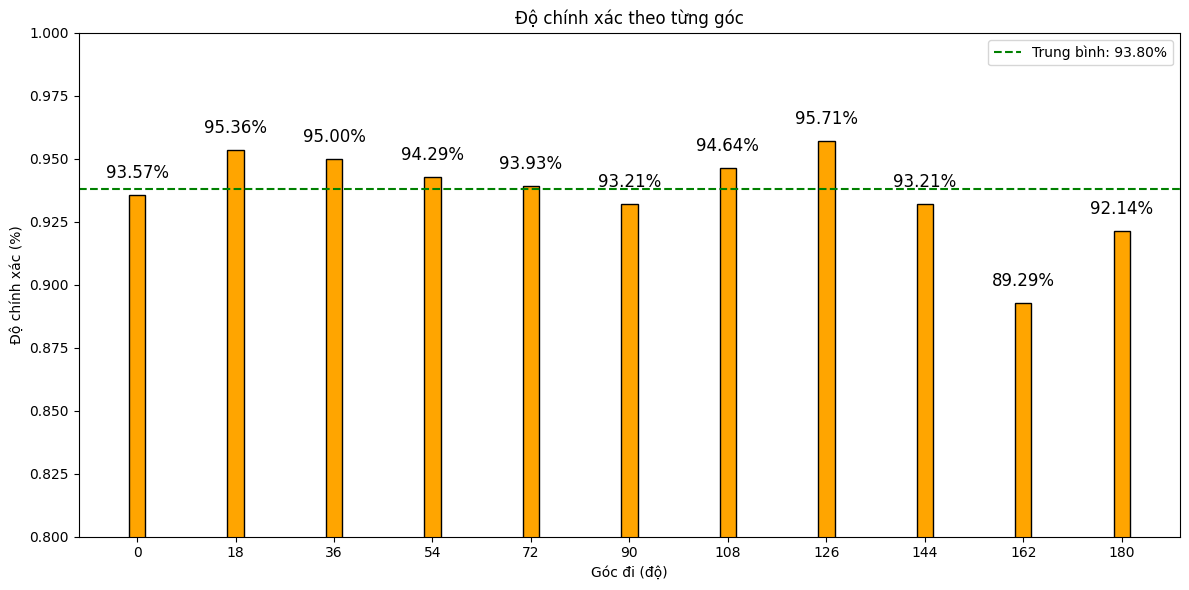

In [53]:
# Tìm chỉ số (index) của view có độ chính xác cao nhất và thấp nhất
max_idx = view_acc.index(max(view_acc))
min_idx = view_acc.index(min(view_acc))

# Tìm giá trị view tương ứng
best_view = views[max_idx]
worst_view = views[min_idx]

# In kết quả
print(f'View có độ chính xác cao nhất: {best_view} độ — Độ chính xác: {view_acc[max_idx]*100:.2f}%')
print(f'View có độ chính xác thấp nhất: {worst_view} độ — Độ chính xác: {view_acc[min_idx]*100:.2f}%')

# Vẽ bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(views, view_acc, color='orange', edgecolor='black', width = 3)

# Vẽ đường thẳng thể hiện accuracy trung bình
plt.axhline(mean_accuracy, color='green', linestyle='--', label=f'Trung bình: {mean_accuracy*100:.2f}%')

# Gắn nhãn trục
plt.xlabel('Góc đi (độ)')
plt.ylabel('Độ chính xác (%)')
plt.title('Độ chính xác theo từng góc')
plt.xticks(views)
plt.ylim(0.8, 1.0) 
plt.legend()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height*100:.2f}%', 
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

## Biểu diễn dữ liệu đặc trưng PCA và t-SNE

### vẽ một cái 2d và 3d của PCA, sau đó thử sử dụng Sammon Mapping

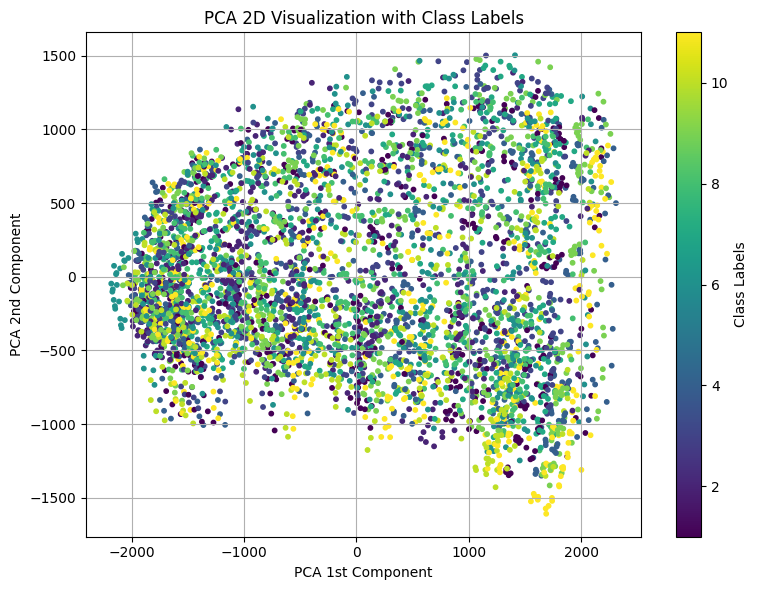

C:\Users\HUY\AppData\Local\Temp\ipykernel_3316\770645781.py:20: UserWarning: Adding colorbar to a different Figure <Figure size 800x600 with 3 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  plt.colorbar(scatter2d, label='Class Labels')


<Figure size 640x480 with 0 Axes>

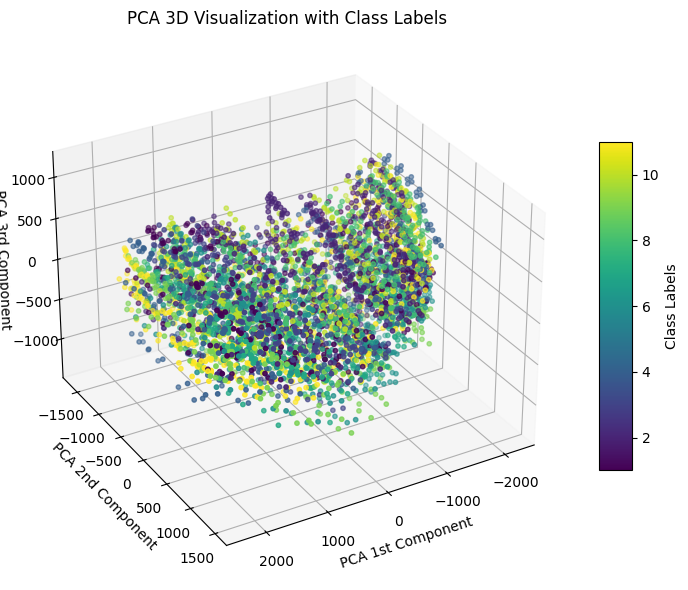

In [64]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

pca3d = x_train[:, :3]  # PCA 3 thành phần

# --- Biểu đồ 2D ---
plt.figure(figsize=(8, 6))
scatter2d = plt.scatter(
    pca3d[:, 0], pca3d[:, 1],
    c=y_train, cmap='viridis', s=10
)
plt.xlabel('PCA 1st Component')
plt.ylabel('PCA 2nd Component')
plt.title('PCA 2D Visualization with Class Labels')
plt.colorbar(scatter2d, label='Class Labels')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.colorbar(scatter2d, label='Class Labels')

# --- Biểu đồ 3D ---
fig = plt.figure(figsize=(8, 6))
ax3d = fig.add_subplot(111, projection='3d')
scatter3d = ax3d.scatter(
    pca3d[:, 0], pca3d[:, 1], pca3d[:, 2],
    c=y_train, cmap='viridis', s=10
)
ax3d.set_xlabel('PCA 1st Component')
ax3d.set_ylabel('PCA 2nd Component')
ax3d.set_zlabel('PCA 3rd Component')
ax3d.set_title('PCA 3D Visualization with Class Labels')
ax3d.view_init(elev=30, azim=60)
cbar3d = fig.colorbar(scatter3d, ax=ax3d, shrink=0.6, aspect=10)
cbar3d.set_label('Class Labels')
plt.tight_layout()
plt.show()


### vẽ 1 cái 2d và 3d cho t-SNE, sau đó sử dụng Sammon Mapping

c:\Users\HUY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


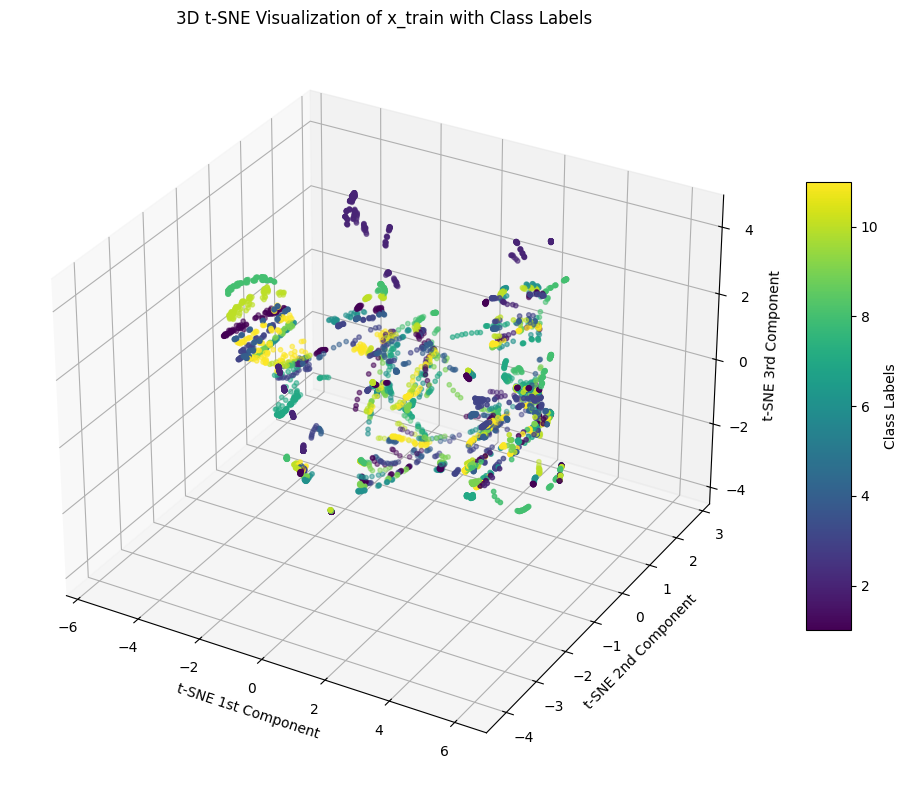

c:\Users\HUY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


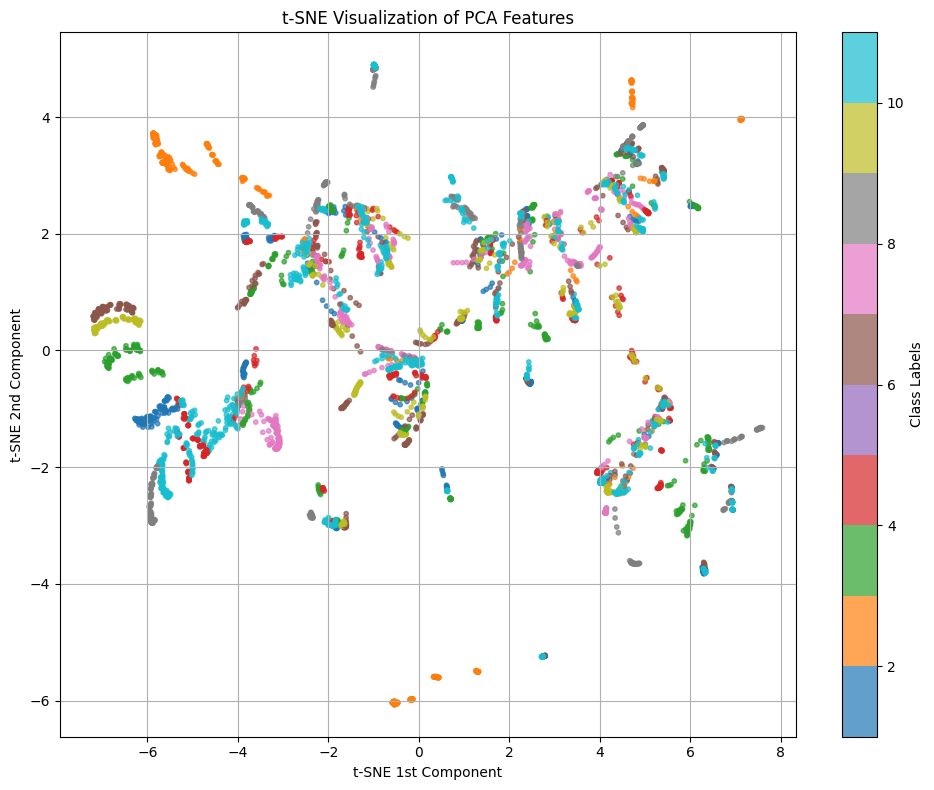

In [65]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

# Giảm chiều dữ liệu xuống 3 thành phần bằng t-SNE
tsne_3d = TSNE(n_components=3, random_state=42, perplexity=10, n_iter=250)
x_train_tsne_3d = tsne_3d.fit_transform(x_train)

# Hiển thị dữ liệu t-SNE trên đồ thị 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    x_train_tsne_3d[:, 0], x_train_tsne_3d[:, 1], x_train_tsne_3d[:, 2],
    c=y_train, cmap='viridis', s=10
)

# Thêm colorbar để biểu diễn nhãn
cbar = plt.colorbar(scatter, ax=ax, shrink=0.6, aspect=10)
cbar.set_label('Class Labels')

# Gắn nhãn trục và tiêu đề
ax.set_xlabel('t-SNE 1st Component')
ax.set_ylabel('t-SNE 2nd Component')
ax.set_zlabel('t-SNE 3rd Component')
ax.set_title('3D t-SNE Visualization of x_train with Class Labels')

plt.tight_layout()
plt.show()

tsne_2d = TSNE(n_components=2, random_state=42, perplexity=10, n_iter=250)
x_train_tsne_2d = tsne_2d.fit_transform(x_train)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    x_train_tsne_2d[:, 0], x_train_tsne_2d[:, 1],
    c=y_train, cmap='tab10', s=10, alpha=0.7
)
plt.colorbar(scatter, label='Class Labels')
plt.title('t-SNE Visualization of PCA Features')
plt.xlabel('t-SNE 1st Component')
plt.ylabel('t-SNE 2nd Component')
plt.grid(True)
plt.tight_layout()
plt.show()

In [66]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def sammon_mapping(X, n_components=2, max_iter=50, tol=1e-1):
    D = squareform(pdist(X)) + 1e-1  # avoid division by zero
    scale = 0.5 / D.sum()

    # Initialize with PCA
    
    from sklearn.decomposition import PCA
    init = PCA(n_components=n_components).fit_transform(X)
    Y = init.copy()
    Y = init.copy()

    def sammon_error(Y_flat):
        Y = Y_flat.reshape(X.shape[0], n_components)
        d = squareform(pdist(Y)) + 1e-1
        delta = ((D - d)**2 / D).sum()
        return scale * delta

    result = minimize(
        sammon_error,
        Y.ravel(),
        method='L-BFGS-B',
        options={'maxiter': max_iter, 'disp': True, 'ftol': tol}
    )

    return result.x.reshape(X.shape[0], n_components)


In [67]:
x_train.shape

(4620, 18)

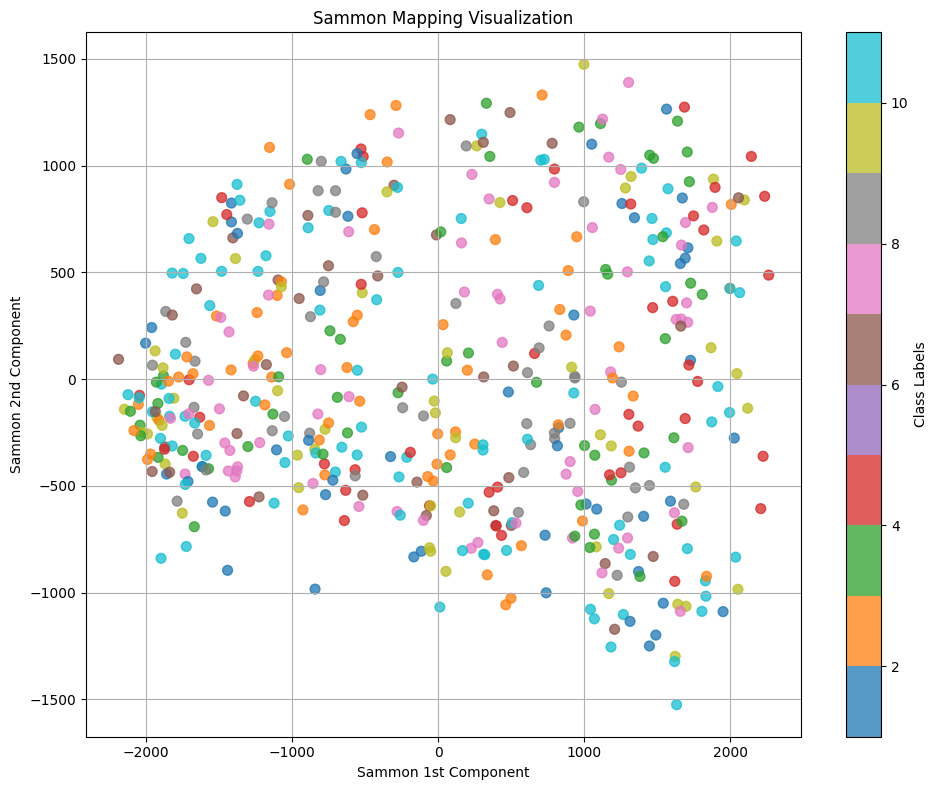

In [68]:
# Giả sử bạn có x_train và y_train

idx = np.random.choice(len(x_train), 500, replace=False)
x_small = x_train[idx]
y_small = y_train[idx]

x_sammon = sammon_mapping(x_small, n_components=2)

# Vẽ biểu đồ kết quả
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_sammon[:, 0], x_sammon[:, 1], c=y_small, cmap='tab10', s=50, alpha=0.75)
plt.colorbar(scatter, label='Class Labels')
plt.title("Sammon Mapping Visualization")
plt.xlabel("Sammon 1st Component")
plt.ylabel("Sammon 2nd Component")
plt.grid(True)
plt.tight_layout()
plt.show()


### Thường xuyên xuất hiện sự outline của đối tượng thứ 5, có thể do thiếu dáng đi góc 0 độ... thử lại vs tập dữ liệu đầy đủ dáng đi hơn để xem hiện tượng này có tiếp diễn nữa ko